In [1]:
# 생존 여부는 'Survived' column에 저장되어 있습니다. 0이 사망, 1이 생존을 의미합니다.
# 좌석 등급은 'Pclass' column에 저장되어 있습니다. 1은 1등실, 2는 2등실, 3은 3등실을 의미합니다.
# 지불한 요금은 'Fare' column에 저장되어 있습니다.
# EDA(탐색적 데이터 분석)를 한 후, 다음 보기 중 맞는 것을 모두 고르시오.

%matplotlib inline
import pandas as pd
import seaborn as sns

df = pd.read_csv('Desktop/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:ylabel='Frequency'>

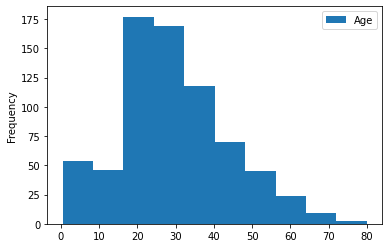

In [2]:
# 1. 타이타닉의 승객은 30대와 40대가 가장 많다. (X)
df.plot(kind='hist', y='Age')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

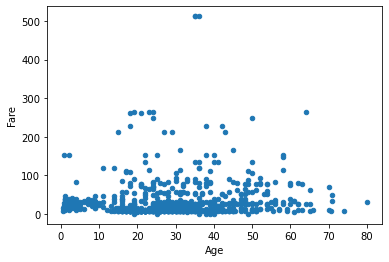

In [3]:
# 2. 가장 높은 요금을 낸 사람은 30대이다. (O)
df.plot(kind='scatter', x='Age', y='Fare')

In [4]:
# 3. 생존자가 사망자보다 더 많다. (X)
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
# 4. 1등실, 2등실, 3등실 중 가장 많은 사람이 탑승한 곳은 3등실이다. (O)
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

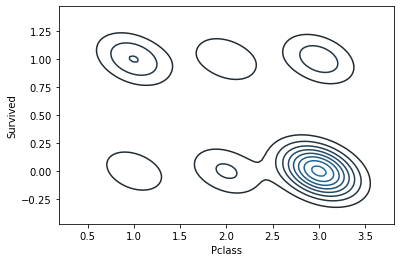

In [6]:
# 5. 가장 생존율이 높은 객실 등급은 1등실이다. (O)
sns.kdeplot(df['Pclass'], df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

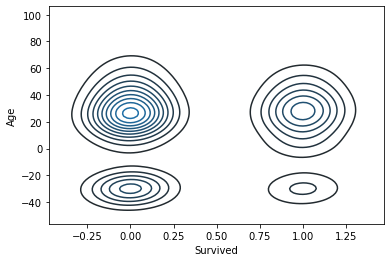

In [40]:
# 6. 나이가 어릴수록 생존율이 높다. (X)
import numpy as np


sns.kdeplot(df['Survived'], df['Age'].fillna(-30))

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

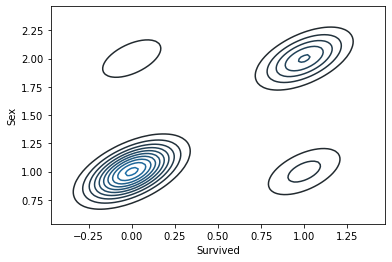

In [41]:
# 7. 나이보다 성별이 생존율에 더 많은 영향을 미친다. (O)
sns.kdeplot(df['Survived'], df['Sex'])

<AxesSubplot:ylabel='Frequency'>

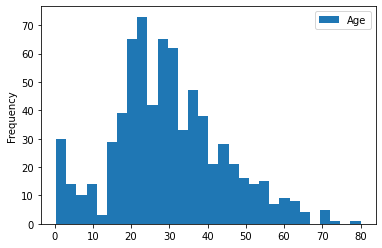

In [43]:
#  모범답안
# 1. 1: "타이타닉의 승객은 30대와 40대가 가장 많다."
df.plot(kind='hist', y='Age', bins=30)

# 30대와 40대보다는 20대가 더 많기 때문에 틀린 설명입니다.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

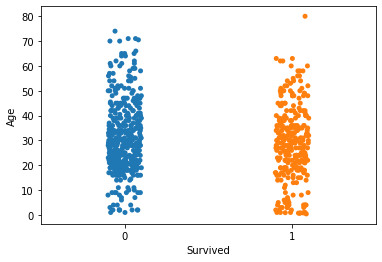

In [46]:
# 6: "나이가 어릴수록 생존율이 높다."
sns.stripplot(data=df, x="Survived", y="Age")

<AxesSubplot:xlabel='Survived', ylabel='Age'>

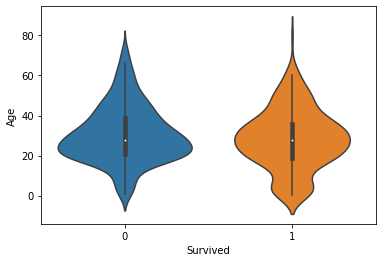

In [48]:
sns.violinplot(data=df, x="Survived", y="Age")

# 생존한 사람들의 나이 분포와 사망한 사람들의 나이 분포 사이에는 큰 차이가 보이지 않습니다.  

<AxesSubplot:xlabel='Survived', ylabel='Age'>

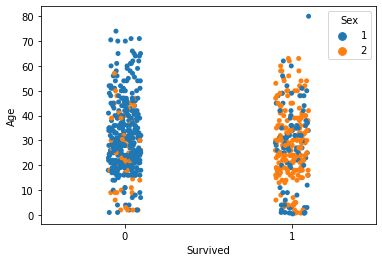

In [50]:
# 7: "나이보다 성별이 생존율에 더 많은 영향을 미친다."
sns.stripplot(data=df, x="Survived", y="Age", hue="Sex")

# 나이보다는 확실히 성별에 영향을 많이 받았다는 걸 알 수 있습니다.